# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [246]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
print(data.info()) # мда, выглядит страшно..
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


### Вывод

Очень много столбцов с недостающими значениями. Всего должно быть 23699. Касательно типов, столбцы last_price, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, и days_exposition лучше перевести в int, естественно нужно обработать дату first_day_exposition. is_apartment должен быть bool, locality_name - string. 
Замена пропусков: living_area, kitchen_area, ceiling_height заменим на округленное среднее значение(вроде звучит справедливо). floors_total заменим также(хотя это странно, но мы же не меняем сами объявления, а делаем все ради анализа). Со столбцом balcony поступим как предложено в теории к заданию - заменим отсутствующие значения на 0. С locality_name ничего особо не сделаешь, да их и не очень много, просто заменим на какое-нибудь слово-заглушку. Остальные столбцы тоже нельзя заменять на средние, так что тут как и в предыдущем случае.  


### Шаг 2. Предобработка данных

#### Пропуски

In [247]:
def fill_na(column): # заполняет пропуски средним
    mean = data[column].mean()
    data[column] = data[column].fillna(mean)
    
    
def to_int(column): # округление и перевод в int
    data[column] = data[column].round().astype('int')
    
    
fill_na('living_area')
fill_na('kitchen_area')
fill_na('ceiling_height')
fill_na('floors_total')

to_int('last_price')
to_int('living_area')
to_int('kitchen_area')
to_int('ceiling_height')
to_int('total_area')
to_int('floors_total')

data['is_apartment'] = data['is_apartment'].fillna(0).astype('bool') # переводим в булев тип. Пропуски заполняем 0,
                                                                     # потому что сами гадать не можем
data['balcony'] = data['balcony'].fillna(0).astype('bool') # и балконы в bool
data['locality_name'] = data['locality_name'].fillna('').astype('str')

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d') # оставим только дату
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int').replace(0, 'sold') # так как в приложении яндекс 
# недвижимости пользоваетельм не указывается кол-во дней с момента публикации, то можно предположить что NaN = продано  

tup = ['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']
for i in tup: # пройдемся по расстояниям до всего подряд и заменим пропуски на not stated. Тип object это же не плохо?
    try:
        data[i] = data[i].fillna(0).round().astype('int').replace(0, 'not stated')
    except Exception:
        continue
        
print(data.info()) # теперь всего поровну
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null int64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null int64
floors_total            23699 non-null int64
living_area             23699 non-null int64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null int64
balcony                 23699 non-null bool
locality_name           23699 non-null object
airports_nearest        23699 non-null object
cityCenters_nearest     23699 non-null object
parks_around3000        23699 non-null object
parks_nearest           23699 non-null object
ponds_around3000        23

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,3,16,51,8,False,...,25,False,Санкт-Петербург,18863,16028,1,482,2,755,sold
1,7,3350000,40,2018-12-04,1,3,11,19,1,False,...,11,True,посёлок Шушары,12817,18603,not stated,not stated,not stated,not stated,81
2,10,5196000,56,2015-08-20,2,3,5,34,4,False,...,8,False,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159,2015-07-24,3,3,14,34,9,False,...,11,False,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100,2018-06-19,2,3,14,32,13,False,...,41,False,Санкт-Петербург,31856,8098,2,112,1,48,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,134,2017-03-21,3,4,5,73,3,False,...,14,False,Санкт-Петербург,24665,4232,1,796,3,381,sold
23695,14,3100000,59,2018-01-15,3,3,5,38,4,False,...,8,False,Тосно,not stated,not stated,not stated,not stated,not stated,not stated,45
23696,18,2500000,57,2018-02-11,2,3,3,30,1,False,...,11,False,село Рождествено,not stated,not stated,not stated,not stated,not stated,not stated,sold
23697,13,11475000,77,2017-03-28,2,3,17,34,12,False,...,23,True,Санкт-Петербург,39140,10364,2,173,3,196,602


#### Дубликаты

In [248]:
print(data.duplicated().sum()) 

0


### Шаг 3. Посчитайте и добавьте в таблицу

In [249]:
data['metre_cost'] = (data['last_price'] / data['total_area']).round().astype('int') # цена за кв. метр

data['floor_type'] = 0 # задаем тип этажа
for i in range(len(data['floor'])):
    if data['floor'][i] == data['floors_total'][i]:
        data['floor_type'][i] = 'last'
    elif data['floor'][i] == 1:
        data['floor_type'][i] = 'first'
    else:
        data['floor_type'][i] = 'another'

data['kitchen_part'] = (data['kitchen_area'] / data['total_area']).round(2) # доля кухни 
data['living_part'] = (data['living_area'] / data['total_area']).round(2) # доля жилой площади
data['last_price'] = (data['last_price'] / 1000000).round(3) # не удобно анализировать цену в таком виде, выведем в миллионах
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_cost,floor_type,kitchen_part,living_part
0,20,13.000,108,2019-03-07,3,3,16,51,8,False,...,16028,1,482,2,755,sold,120370,another,0.23,0.47
1,7,3.350,40,2018-12-04,1,3,11,19,1,False,...,18603,not stated,not stated,not stated,not stated,81,83750,first,0.28,0.48
2,10,5.196,56,2015-08-20,2,3,5,34,4,False,...,13933,1,90,2,574,558,92786,another,0.14,0.61
3,0,64.900,159,2015-07-24,3,3,14,34,9,False,...,6800,2,84,3,234,424,408176,another,0.07,0.21
4,2,10.000,100,2018-06-19,2,3,14,32,13,False,...,8098,2,112,1,48,121,100000,another,0.41,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9.700,134,2017-03-21,3,4,5,73,3,False,...,4232,1,796,3,381,sold,72388,another,0.10,0.54
23695,14,3.100,59,2018-01-15,3,3,5,38,4,False,...,not stated,not stated,not stated,not stated,not stated,45,52542,another,0.14,0.64
23696,18,2.500,57,2018-02-11,2,3,3,30,1,False,...,not stated,not stated,not stated,not stated,not stated,sold,43860,first,0.19,0.53
23697,13,11.475,77,2017-03-28,2,3,17,34,12,False,...,10364,2,173,3,196,602,149026,another,0.30,0.44


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Гистограммы

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b77b4ad30>]],
      dtype=object)

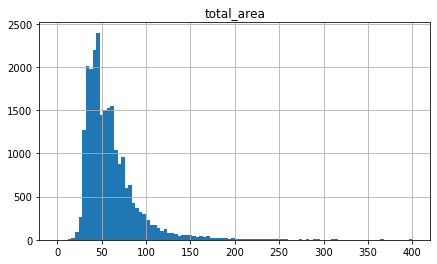

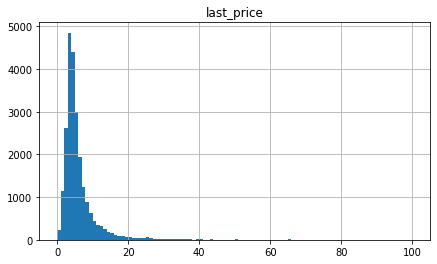

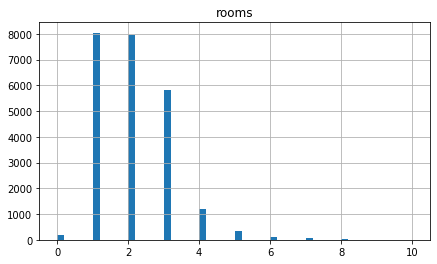

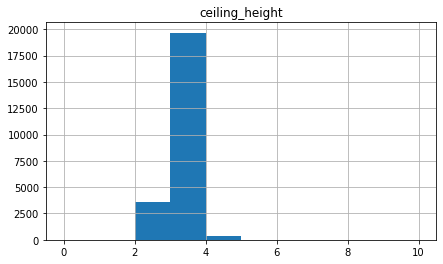

In [250]:
data.hist('total_area', range = (0, 400), bins = 100,figsize = (7,4)) # гистограмма площади

data.hist('last_price', range = (0, 100), bins = 100,figsize = (7,4)) # гистограмма стоимости квартир
data.hist('rooms', range = (0, 10), bins = 50,figsize = (7,4)) # гистограмма по кол-ву комнат
data.hist('ceiling_height', range = (0, 10), bins = 10,figsize = (7,4)) # гистограмма по потолкам

#### Выпадающие значения

In [251]:
# лучше сразу избавиться от "крайних значений", чтобы в дальнейше метрики были точнее
print('Максимальная цена:', data['last_price'].max())
sold_in = data[data['days_exposition'] != 'sold'] # отберем столбцы с числовыми значениями
print('Максимальная длительность продажи:', sold_in['days_exposition'].max())
print('Максимальная площадь:', data['total_area'].max())
print('Максимальное кол-во комнат:', data['rooms'].max())
print('Максимальная этажность:', data['floors_total'].max())
print('Максимальный этаж:', data['floor'].max())


Максимальная цена: 763.0
Максимальная длительность продажи: 1580
Максимальная площадь: 900
Максимальное кол-во комнат: 19
Максимальная этажность: 60
Максимальный этаж: 33


In [252]:
def quant(column):
    func_data = data.query('days_exposition != "sold"')
    func_data['days_exposition'] = func_data['days_exposition'].astype('int')
    print('Квантиль для {}:'.format(column),func_data[column].quantile(0.99))
    print()
    
    
quant('last_price')
quant('total_area')
quant('days_exposition')
quant('rooms')
quant('floor')

Квантиль для last_price: 34.0

Квантиль для total_area: 190.0

Квантиль для days_exposition: 1068.6599999999962

Квантиль для rooms: 5.0

Квантиль для floor: 23.0



В принципе по гистограммам уже можно обозначить края значений для анализа(где хвост графика близится к нулю). Но, например, цена в 760 миллионов может оказать влияние на среднее значение. Взглянув на гистограммы и выбивающиеся значения, отсеем лишнее при помощи срезов. Квантиль говорит, что 99% квартир стоят меньше 34 млн. Далее им и воспользуемся

#### Время продажи квартиры

Среднее кол-во дней до продажи: 167
Квантили кол-ва дней до продажи:
0.25     44
0.50     93
0.75    222
0.85    345
Name: days_exposition, dtype: int64


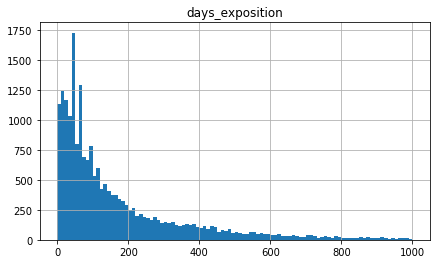

In [253]:
sold_in['days_exposition'] = sold_in['days_exposition'].astype('int')
sold_in.hist('days_exposition', range = (0, 1000), bins = 100,figsize = (7,4)) # гистограмма по
good_data = sold_in.query('days_exposition <= 1000')
print('Среднее кол-во дней до продажи:', good_data['days_exposition'].mean().round().astype('int'))
print('Квантили кол-ва дней до продажи:')
print(good_data['days_exposition'].quantile([0.25, 0.5, 0.75, 0.85]).round().astype('int'))

Медиана почти вдвое меньше среднего, но ей мы доверяем больше. Короче говоря, нормальный срок продажи вертится около сотни дней. Что касается крайних значений: согласно гистограмме, многие квартиры продаются очень быстро, чуть ли не в первый день. В приложении есть очень много новостроек, девелоперы которых обычно выгружают все квартиры сразу, скорее всего именно они так быстро и продаются. Самая же необычно долгая продажа длилась 1580 дней(как мы выяснили из максимального значения столбца). Почти четыре с половиной года... Но даже год жизни объявления, судя по гистограмме, уже должен вызывать вопросы, так как более 85% недвижимости успевает продаться к этому сроку.


#### Факторы влияния на продажу

In [254]:
print('Корреляция метража к цене до отброса выбивающихся значений:', good_data['last_price'].astype('int').corr(good_data['total_area']))
good_data = good_data.query('last_price < 34') # смотрим на квантили выше
good_data = good_data.query('total_area < 190')
print('Корреляция метража к цене после отброса выбивающихся значений:', good_data['last_price'].astype('int').corr(good_data['total_area']))
print('Корреляция кол-ва комнат к цене:', good_data['last_price'].astype('int').corr(good_data['rooms']))

floor_data = good_data.query('floor == floors_total or floor == 1')
print('Корреляция этажа и цены:', floor_data['floor'].corr(floor_data['last_price']))


Корреляция метража к цене до отброса выбивающихся значений: 0.6403732271543621
Корреляция метража к цене после отброса выбивающихся значений: 0.7748338597909776
Корреляция кол-ва комнат к цене: 0.48537657553453917
Корреляция этажа и цены: 0.1693515477706493


Вполне логично, что цена зависит от изученных параметров, теперь есть и численное подтверждение. Также стоит обратить внимание на разницу в корреляциях 'до' и 'после' редактирования значений. Есть вопросы только с этажной зависимостью, так как корреляция здесь совсем мизерная, но это и не является достаточным условием для окончательных выводов. Последний этаж скорее играет роль в дорогих квартирах или апартаментах(когда в силу вступает элемент элитности). В обыкновенных же зданиях этот фактор не имеет большого веса.

#### Анализ 10 населенных пунктов

In [255]:
print(good_data['locality_name'].value_counts().head(10)) # взглянем на наш топ пунктов

for town in good_data['locality_name'].value_counts().head(10).index: # посчитаем среднее
    town_data = data.query('locality_name == @town')
    print('Средняя цена квадратного метра в {}:'.format(town), (town_data['metre_cost'].mean() / 1000).round().astype('int'), 'тысяч(и)')


Санкт-Петербург      13146
посёлок Мурино         512
посёлок Шушары         404
Всеволожск             335
Колпино                305
посёлок Парголово      300
Пушкин                 297
деревня Кудрово        294
Гатчина                268
Выборг                 207
Name: locality_name, dtype: int64
Средняя цена квадратного метра в Санкт-Петербург: 115 тысяч(и)
Средняя цена квадратного метра в посёлок Мурино: 86 тысяч(и)
Средняя цена квадратного метра в посёлок Шушары: 79 тысяч(и)
Средняя цена квадратного метра в Всеволожск: 69 тысяч(и)
Средняя цена квадратного метра в Колпино: 75 тысяч(и)
Средняя цена квадратного метра в посёлок Парголово: 90 тысяч(и)
Средняя цена квадратного метра в Пушкин: 103 тысяч(и)
Средняя цена квадратного метра в деревня Кудрово: 93 тысяч(и)
Средняя цена квадратного метра в Гатчина: 69 тысяч(и)
Средняя цена квадратного метра в Выборг: 58 тысяч(и)


Итак, первое место ожидаемо достается Питеру со 115 тысячами. Далее следуют Пушкин (103 тыс.), Мурино (86 тыс.) и Шушары (79 тыс.) Самая маленькая средняя цена за метр в Выборге - всего 58 тысяч.


AxesSubplot(0.125,0.125;0.775x0.755)


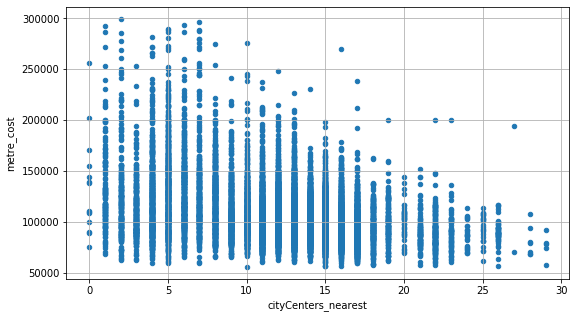

In [256]:
sp_data = good_data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest != "not stated" and 55000 < metre_cost < 300000')
sp_data['cityCenters_nearest'] = sp_data['cityCenters_nearest'].astype('int')
sp_data['cityCenters_nearest'] = (sp_data['cityCenters_nearest'] / 1000).round().astype('int') # разобьем на километры

print(sp_data.plot(x = 'cityCenters_nearest', y = 'metre_cost', kind='scatter', figsize=(9, 5), sharex=False, grid=True))


Вот такое вот чудо получилось.. Некрасиво, но тенденция есть. Рост прекращается где-то между 5 и 10 километрами. Окей пусть радиус окружности, ограничивающей центр будет равен 7 км (на втором столбце от пятерки прекращается рост).


#### Квартиры в центре

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b7dcfe358>]]
Среднее по last_price во всей выборке: 6.542
Среднее по last_price в центре 9.809
Медиана по last_price во всей выборке: 4.65
Медиана по last_price в центре 8.3

Среднее по rooms во всей выборке: 2.071
Среднее по rooms в центре 2.594
Медиана по rooms во всей выборке: 2.0
Медиана по rooms в центре 3.0

Среднее по total_area во всей выборке: 60.341
Среднее по total_area в центре 78.314
Медиана по total_area во всей выборке: 52.0
Медиана по total_area в центре 72.0

Среднее по ceiling_height во всей выборке: 2.894
Среднее по ceiling_height в центре 3.063
Медиана по ceiling_height во всей выборке: 3.0
Медиана по ceiling_height в центре 3.0



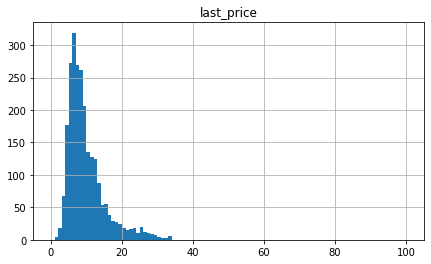

In [257]:
centre_data = good_data.query('cityCenters_nearest != "not stated"')
centre_data['cityCenters_nearest'] = centre_data['cityCenters_nearest'].astype('int')
centre_data = centre_data.query('cityCenters_nearest < 7000')
print(centre_data.hist('last_price', range = (0, 100), bins = 100, figsize = (7,4)))

def analyzer(column):
    print('Среднее по {} во всей выборке:'.format(column), data[column].mean().round(3))
    print('Среднее по {} в центре'.format(column), centre_data[column].mean().round(3))
    print('Медиана по {} во всей выборке:'.format(column), data[column].median().round(3))
    print('Медиана по {} в центре'.format(column), centre_data[column].median().round(3))
    print()
    
analyzer('last_price')
analyzer('rooms')
analyzer('total_area')
analyzer('ceiling_height')



Гистограмма хоть и немного отдалилась от нуля, по сравнению с общей гистограммой, но разница все равно небольшая. Вероятно потому, что по Питеру и так больше всего данных (целых 13 тысяч), и они больше всего влияют на выборку, так что гистограммы нам тут мало помогут. Зато средние значения и медианы просто кричат нам о повышении цен практически вдвое. Также в среднем прибавилось полкомнаты, а по медиане вообще одна. Следовательно увеличился и метраж, на 29 метров в среднем и на 21 по медиане. Даже потолки немного подросли. 

#### этаж, дата

In [258]:
print('Корреляция последнего этажа с ценой для всей выборки:', good_data.query('floor_type == "last"')['floor'].corr(good_data['last_price']))
print('Корреляция последнего этажа с ценой для центра:', centre_data.query('floor_type == "last"')['floor'].corr(centre_data['last_price']))
print('Корреляция даты с ценой для центра:',centre_data['days_exposition'].corr(centre_data['last_price']))

Корреляция последнего этажа с ценой для всей выборки: 0.13563238157164603
Корреляция последнего этажа с ценой для центра: 0.38241878204935476
Корреляция даты с ценой для центра: 0.1146827523257378


Как приятно, когда твои предположения подтверждаются. Корреляция цены с последним этажом действительно увеличилась по сравнению со всей выборкой, хотя зависимость все равно не значительная(интересно какая ситуация получится в Нью-Йорке с его пентхаусами за десятки миллионов долларов на последних этажах). Не очень понятно, как может влиять дата размещения на стоимость, разве что смотреть для каждого предложения отдельно, и то тут скорее длительность продажи и ситуация на рынке в целом может повлиять.


### Шаг 5. Общий вывод

Даже не знаю, что оставить на общий вывод, все равно ещё есть вопросы по зависимости цены от даты, и точно найдутся какие-нибудь недочеты. Отправляю на ревью, чтобы поскорее все поправить. 

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [ ]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [X]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [X]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [X]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [X]  в каждом этапе есть выводы
- [ ]  есть общий вывод